### Chapter 4 Pandas Data Visualization

Exercise 1

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
src_file = Path.cwd() / 'data' / 'raw' / 'EPA_fuel_economy.csv'

In [3]:
df = pd.read_csv(src_file)

In [4]:
df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


<AxesSubplot:ylabel='Frequency'>

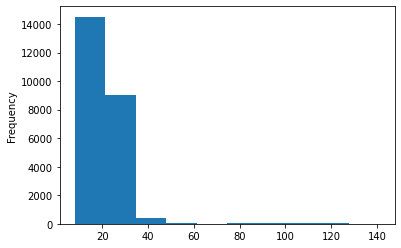

In [5]:
df['comb08'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

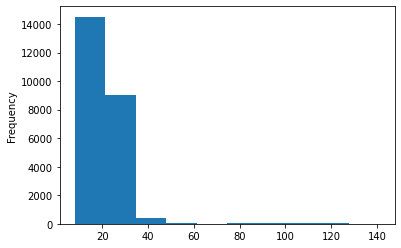

In [6]:
df['comb08'].plot.hist()

<AxesSubplot:>

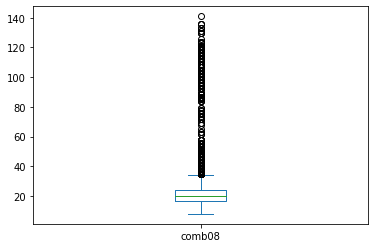

In [7]:
df['comb08'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

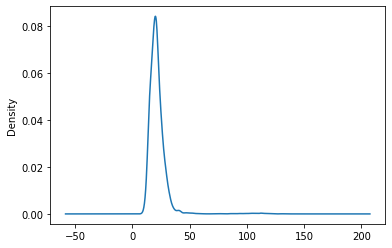

In [8]:
df['comb08'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

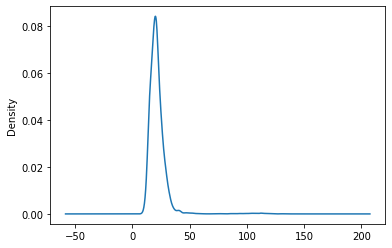

In [9]:
df['comb08'].plot(kind='kde')

In [10]:
avg_by_year = df.groupby(['year']).agg({'highway08': 'mean', 
                          'city08': 'mean', 'comb08': 'mean'})
avg_by_year

,highway08,city08,comb08
year,,,
2000,23.414286,17.221429,19.526190
2001,23.328211,17.275521,19.479693
2002,23.030769,16.893333,19.168205
2003,22.836207,16.780651,19.000958
2004,23.064171,16.740642,19.067736
2005,23.297599,16.851630,19.193825
2006,23.048913,16.626812,18.959239
2007,23.083481,16.605684,18.978686
2008,23.455771,16.900590,19.276327


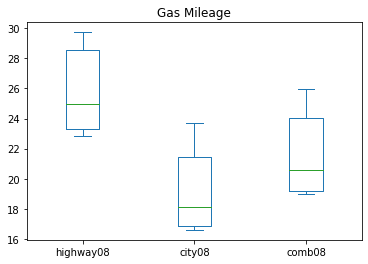

In [11]:
avg_by_year.plot(kind='box',  title='Gas Mileage');

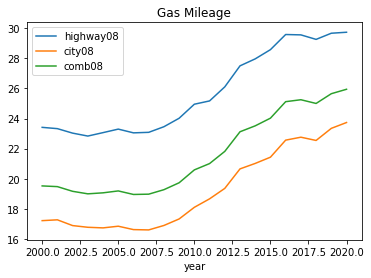

In [12]:
avg_by_year.plot(kind='line',  title='Gas Mileage');

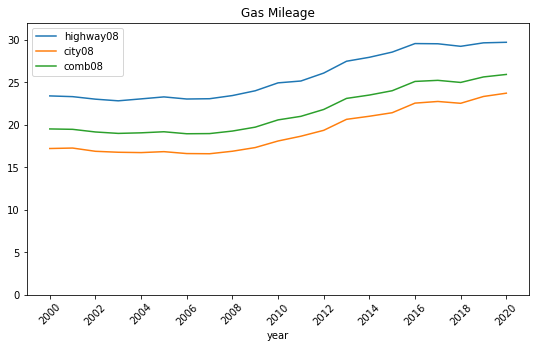

In [13]:
avg_by_year.plot(kind='line', title='Gas Mileage', figsize=(9,5), 
                 xticks=np.arange(2000,2022,2), ylim=(0,32),
                 rot=45);

<AxesSubplot:xlabel='year'>

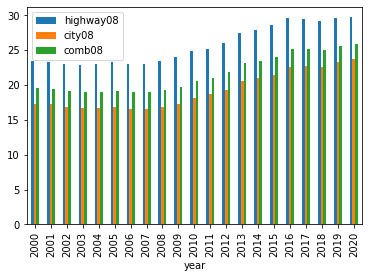

In [14]:
avg_by_year.plot(kind='bar')

<AxesSubplot:xlabel='year'>

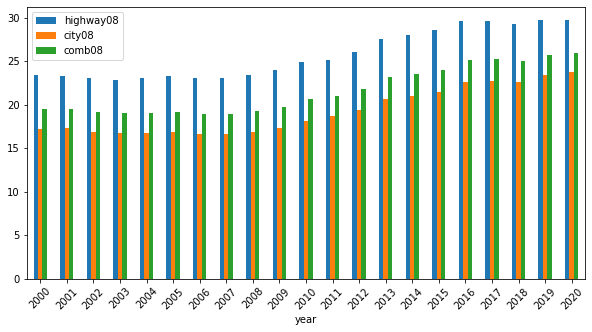

In [15]:
avg_by_year.plot(kind='bar', rot=45, figsize=(10,5))

<AxesSubplot:ylabel='year'>

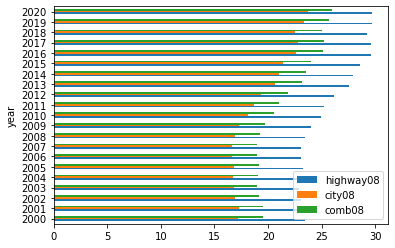

In [16]:
avg_by_year.plot(kind='barh')

<AxesSubplot:xlabel='year'>

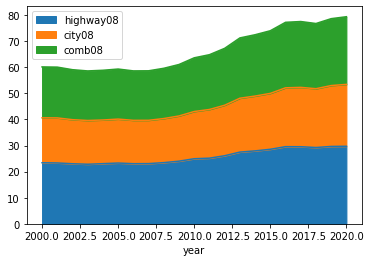

In [17]:
avg_by_year.plot(kind='area')

<AxesSubplot:xlabel='year'>

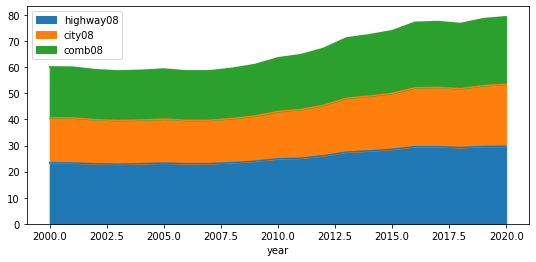

In [18]:
fig, ax = plt.subplots(figsize=(9, 4))
avg_by_year.plot(kind='area', ax=ax)

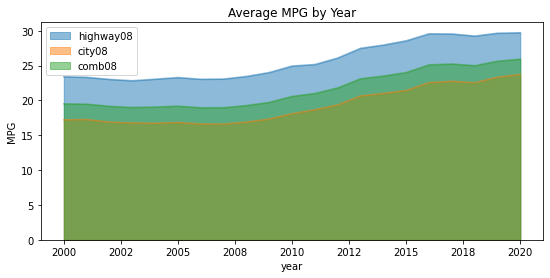

In [19]:
fig, ax1 = plt.subplots(figsize=(9, 4))
avg_by_year.plot(kind='area', ax=ax1, stacked=False)
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"))
ax1.set(ylabel='MPG', title='Average MPG by Year');

## Histogram and Boxplot Methods

<AxesSubplot:ylabel='Frequency'>

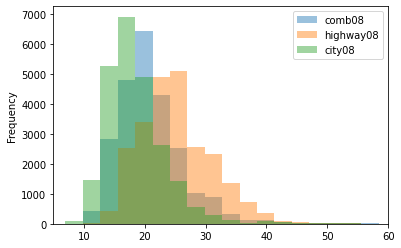

In [20]:
df[['comb08', 'highway08', 'city08']].plot(kind='hist', alpha=0.45, xlim=(5,60), bins=50)

array([[<AxesSubplot:title={'center':'comb08'}>]], dtype=object)

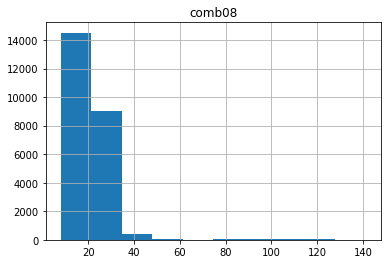

In [21]:
df.hist(column=['comb08'])

array([[<AxesSubplot:title={'center':'highway08'}>,
        <AxesSubplot:title={'center':'city08'}>]], dtype=object)

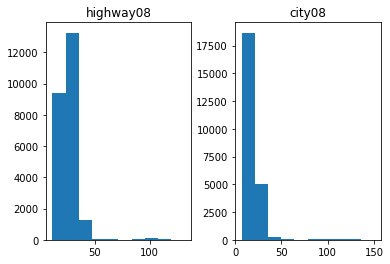

In [22]:
df.hist(column=['highway08', 'city08'], grid=False)

array([[<AxesSubplot:title={'center':'highway08'}>,
        <AxesSubplot:title={'center':'city08'}>],
       [<AxesSubplot:title={'center':'comb08'}>, <AxesSubplot:>]],
      dtype=object)

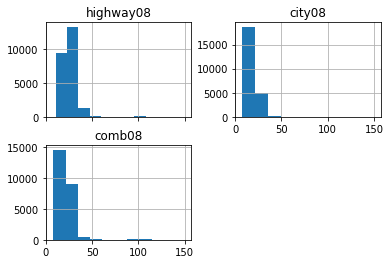

In [23]:
df.hist(column=['highway08', 'city08', 'comb08'], sharex=True)

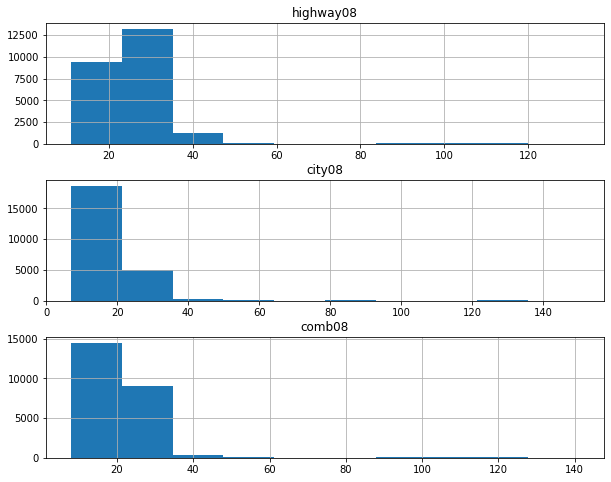

In [24]:
df.hist(column=['highway08', 'city08', 'comb08'], 
        figsize=(10,8), layout=(3,1));

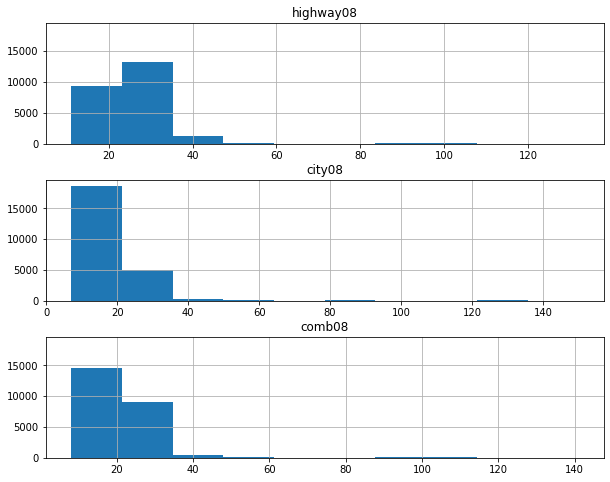

In [25]:
df.hist(column=['highway08', 'city08', 'comb08'], figsize=(10,8), sharey=True, layout=(3,1));

In [26]:
df['fuelType'].value_counts()

Regular                        12069
Premium                         9731
Gasoline or E85                 1339
Diesel                           338
Electricity                      231
Premium or E85                   127
Midgrade                         118
Premium and Electricity           75
Regular Gas and Electricity       52
Premium Gas or Electricity        51
CNG                               47
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: fuelType, dtype: int64

In [27]:
combustion = ['Regular', 'Premium', 'Gasoline or E85', 'Premium or E85', 'Midgrade']
combustion_df = df.query('fuelType == @combustion').copy()

In [28]:
combustion_df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


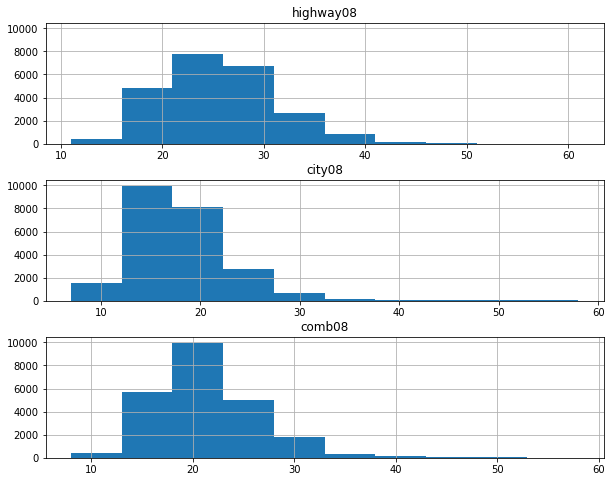

In [29]:
combustion_df.hist(column=['highway08','city08', 'comb08'], 
                   figsize=(10,8), sharey=True, 
                   layout=(3,1));

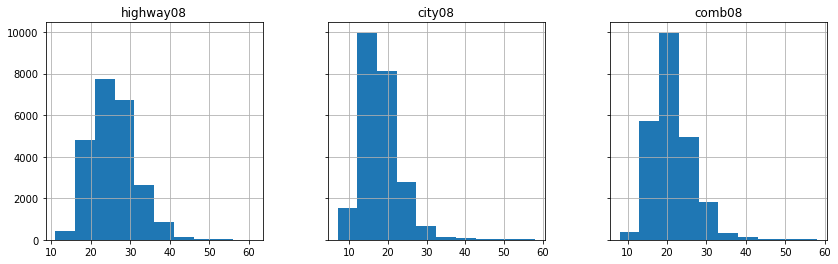

In [30]:
combustion_df.hist(column=['highway08', 
         'city08', 'comb08'], figsize=(14, 4), 
                   sharey=True, layout=(1,3));

<AxesSubplot:>

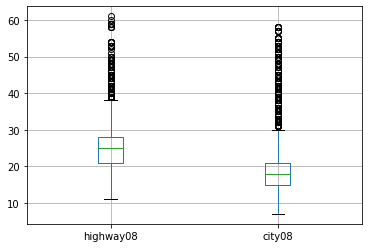

In [31]:
combustion_df.boxplot(column=['highway08', 'city08'])

array([<AxesSubplot:title={'center':'highway08'}, xlabel='cylinders'>,
       <AxesSubplot:title={'center':'city08'}, xlabel='cylinders'>],
      dtype=object)

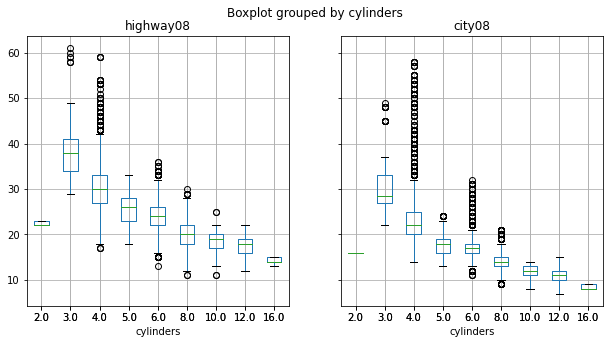

In [32]:
combustion_df.boxplot(column=['highway08', 'city08'], by='cylinders', figsize=(10,5))

array([<AxesSubplot:title={'center':'highway08'}, xlabel='cylinders'>,
       <AxesSubplot:title={'center':'city08'}, xlabel='cylinders'>],
      dtype=object)

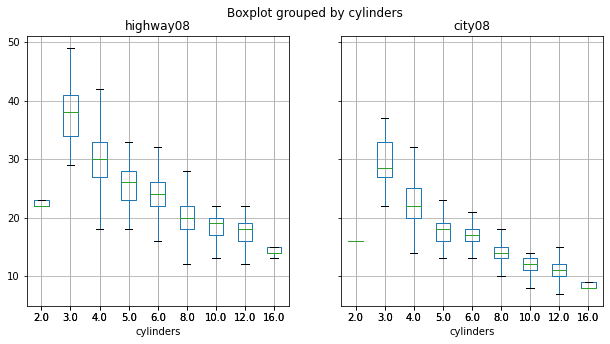

In [33]:
combustion_df.boxplot(column=['highway08', 'city08'], by='cylinders', figsize=(10,5), showfliers=False)

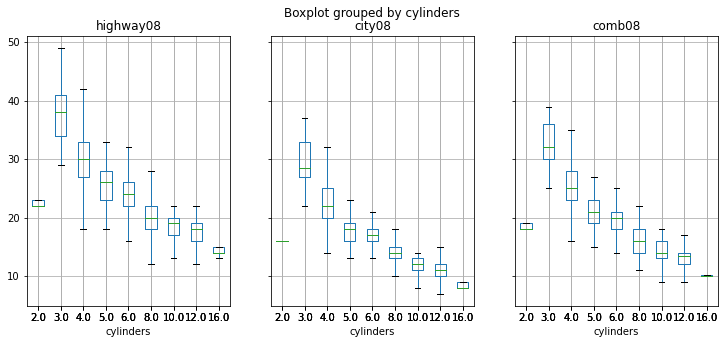

In [34]:
combustion_df.boxplot(column=['highway08', 'city08', 'comb08'], 
                      by='cylinders', figsize=(12,5), layout=(1,3),
                      showfliers=False);